## Estatística Acelerômetro 16/11/2018 a 16/12/2018


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import gmaps
import gmaps.datasets
from pandas import ExcelWriter
from IPython.display import display, HTML

In [2]:
#API KEY


In [13]:
df = pd.read_csv('/home/rogerio/accel_17-11_17-12.csv', 
                 sep=r'\,|\;',
                 header=None,
                 usecols=[1,3,4,5,6,7,8,10,11,12,13,14,15,16],
                 engine='python')
df.rename(columns={1:"time", 
                   3:"yn", 
                   4:"lat_yn", 
                   5:"lon_yn", 
                   6:"yp", 
                   7:"lat_yp", 
                   8:"lon_yp", 
                   10:"xn", 
                   11:"lat_xn", 
                   12:"lon_xn", 
                   13:"xp", 
                   14:"lat_xp", 
                   15:"lon_xp", 
                   16:"id"}, 
          inplace=True)
df['time'] = pd.to_datetime(df.time, format='%d%m%y%H%M%S', errors='coerce')
df['time'] = df.time + pd.to_timedelta(-2,unit='h')
df['yn'] = df.yn.apply(lambda x: 4294967000+x-4294967296)
df['xn'] = df.xn.apply(lambda x: 4294967000+x-4294967296)
df['id'] = pd.Series(df['id']).str.replace('ID=', '', regex=True)
df['id'] = pd.to_numeric(df['id'])

Quantidade de eventos de acelerômetro registrados por rastreador.

In [4]:
g = df.groupby('id')
g['time'].agg(['count'])

,count
id,
3725,10931
3727,10167
3734,477
3738,16037
3744,13703
3883,14621
3978,14376
4053,7870
4080,13507


Remover os rastreadores 4270, 3734 pois tem menos de mil eventos.

In [5]:
# 4209 está com valores estranhos mas por enquanto será considerado.

id_4270 = df[df['id'] == 4270]
#id_4209 = df[df['id'] == 4209]
id_3734 = df[df['id'] == 3734]

df.drop(id_4270.index, inplace=True)
#df.drop(id_4209.index, inplace=True)
df.drop(id_3734.index, inplace=True)

Filtrar os dados.
Investigar os virlocs 3734, 4149, 4270.

In [6]:
df_2 = df[['time', 'yn', 'yp', 'xn', 'xp', 'id']]
g = df_2.groupby('id')
g.agg(['max','min','mean','std'])

yn                            yp                            xn      \
     max  min       mean       std max min       mean        std max min   
id                                                                         
3725 -11  -76 -20.129310  6.470042  50  10  18.752786   4.723747 -11 -55   
3727 -11  -61 -21.783340  6.331461  75  10  17.845671   4.894149 -11 -62   
3738 -11  -79 -23.770896  7.085411  78  10  16.259237   4.631910 -11 -83   
3744 -11 -101 -22.804525  7.836827  99  10  17.220178   7.353427 -11 -91   
3883 -11  -93 -22.223072  7.300227  99  10  16.261234   6.323290 -11 -58   
3978 -11  -78 -25.176518  7.425368  65  10  17.425751   5.269778 -11 -70   
4053 -11  -60 -21.922826  5.766857  45  10  14.693357   3.719128 -11 -54   
4080 -11  -97 -24.873155  7.490042  97  10  20.758104   6.967984 -11 -59   
4149 -11  -90 -22.368803  7.858281  99  10  17.010728   6.927379 -11 -68   
4160 -11  -92 -27.294634  9.192890  90  10  22.710801   6.838258 -11 -57   
4204 -11  -87 -26.151742  7.548740  66  10  16.560035   5.036338 -11 -67   
4209 -11  -93 -22.094772  6.982408  95  10  16.330963   5.629423 -11 -79   
4229 -11  -92 -22.808903  6.858288  83  10  20.291092   5.913594 -11 -59   
4237 -11  -95 -27.204625  9.374907  88  10  27.208653  10.276866 -11 -72   

                           xp                            
           mean       std max min       mean        std  
id                                                       
3725 -19.044497  7.447481  62  10  18.036921   8.170164  
3727 -18.931194  7.895122  71  10  21.367511   9.811302  
3738 -20.237176  8.433814  87  10  21.143728  10.159654  
3744 -17.766290  6.693147  95  10  18.469784   8.547153  
3883 -18.836888  7.753165  68  10  23.617639  10.360900  
3978 -16.294797  5.362466  87  10  20.390327   8.859890  
4053 -18.112802  6.932392  59  10  18.163768   7.852040  
4080 -19.964828  8.346334  74  10  19.966523  10.052265  
4149 -22.300087  8.880366  92  10  19.586257   9.410659  
4160 -21.077352  8.622104  74  10  24.598188  10.782104  
4204 -18.643997  7.609476  77  10  22.384739   9.418195  
4209 -20.183820  8.667302  91  10  20.874707  10.184561  
4229 -19.601947  7.685929  72  10  18.790178   8.383419  
4237 -20.027348  9.254985  77  10  22.753151  10.006988

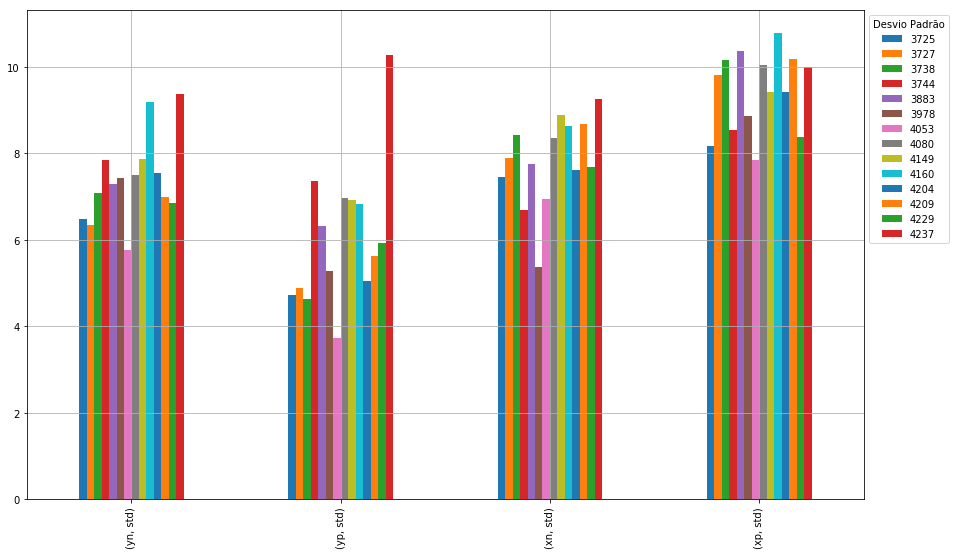

In [29]:
a = g.agg(['std'])
a.reset_index(inplace=True)
a_plot = a.set_index('id').T
a_plot.plot.bar(figsize=(15,9), xticks=range(0, 8), grid=True).legend(title='Desvio Padrão', bbox_to_anchor=(1, 1))


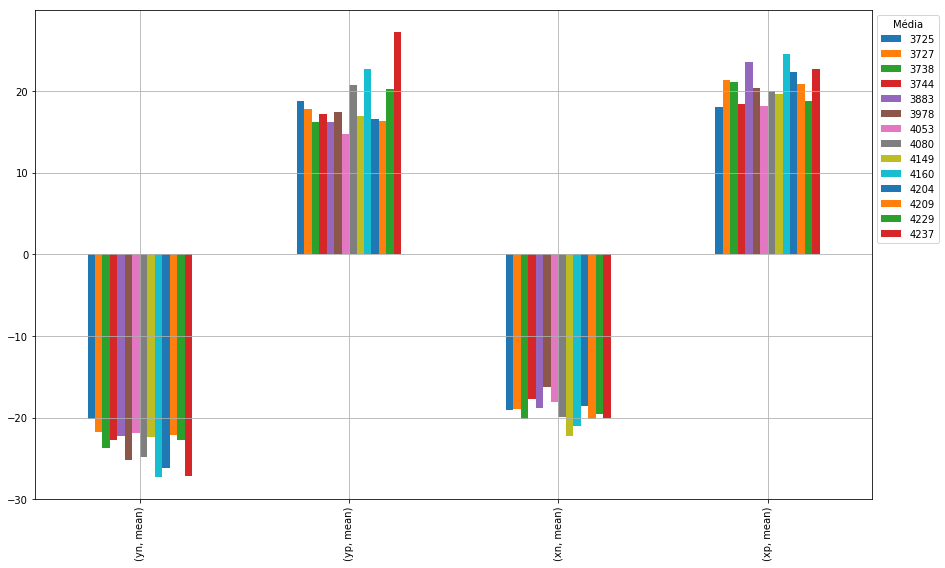

In [8]:
a = g.agg(['mean'])
a.reset_index(inplace=True)
a_plot = a.set_index('id').T
a_plot.plot.bar(figsize=(15,9), grid=True).legend(title='Média', bbox_to_anchor=(1, 1))


### TESTE DE HEATMAP

Todos eventos do eixo Y+ (de todos veículos) plotados em categorias.
10 a 20, 20 a 30, 30 a 40, 40 a 50 e 50+.

In [28]:
df_yp = df[['lat_yp', 'lon_yp', 'yp']]
df_yp_1 = df_yp[df['yp'].between(10,20)]
df_yp_2 = df_yp[df['yp'].between(20,30)]
df_yp_3 = df_yp[df['yp'].between(30,40)]
df_yp_4 = df_yp[df['yp'].between(40,50)]
df_yp_5 = df_yp[df['yp'].between(50,100)]


fig = gmaps.figure(map_type='HYBRID', layout={'width': '900px', 'height': '600px'})
fig.add_layer(gmaps.heatmap_layer(df_yp_1[['lat_yp','lon_yp']], weights=df_yp_1['yp']))
display(fig)

fig2 = gmaps.figure(map_type='HYBRID', layout={'width': '900px', 'height': '600px'})
fig2.add_layer(gmaps.heatmap_layer(df_yp_2[['lat_yp','lon_yp']], weights=df_yp_2['yp']))
display(fig2)

fig3 = gmaps.figure(map_type='HYBRID', layout={'width': '900px', 'height': '600px'})
fig3.add_layer(gmaps.heatmap_layer(df_yp_3[['lat_yp','lon_yp']], weights=df_yp_3['yp']))
display(fig3)

fig4 = gmaps.figure(map_type='HYBRID', layout={'width': '900px', 'height': '600px'})
fig4.add_layer(gmaps.heatmap_layer(df_yp_4[['lat_yp','lon_yp']], weights=df_yp_4['yp']))
display(fig4)

fig5 = gmaps.figure(map_type='HYBRID', layout={'width': '900px', 'height': '600px'})
fig5.add_layer(gmaps.heatmap_layer(df_yp_5[['lat_yp','lon_yp']], weights=df_yp_5['yp']))
display(fig5)


Figure(layout=FigureLayout(height='600px', width='900px'))

Figure(layout=FigureLayout(height='600px', width='900px'))

Figure(layout=FigureLayout(height='600px', width='900px'))

Figure(layout=FigureLayout(height='600px', width='900px'))

Figure(layout=FigureLayout(height='600px', width='900px'))